# Plotting Canadian provinces

In [5]:
import shapefile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline

## Inputs
First we need to load in the shapefile containing a map for each province of Canada and extract some of the impotrant to us features

In [56]:
sf = shapefile.Reader("Canada/Canada.shp")
recs = sf.records()
shapes = sf.shapes()
Nshp = len(shapes)
cns = []
for nshp in xrange(Nshp):
    cns.append(recs[nshp][1])
cns = np.array(cns)

['Qu\xe9bec' 'Nouvelle-\xc9cosse' 'Saskatchewan' 'Alberta'
 'Terre-Neuve-et-Labrador' 'Colombie-Britannique' 'Nouveau-Brunswick'
 '\xcele-du-Prince-\xc9douard' 'Territoire du Yukon' 'Manitoba' 'Ontario'
 'Nunavut' 'Territories Nord-Ouest']


## Mapping data onto provinces

In [73]:
data = {1:18, 
        2:19,
        3:19,
        4:18,
        5:19,
        6:19,
        7:19,
        8:19,
        9:19,
        10:18,
        11:19,
        12:19,
        13:19}

def col(age):
    if age == 18:
        return "#af8dc3"
    elif age == 19:
        return "#7fbf7b"

## Simple Plotting
Once we have the requited inputs we can plot without any extra labels or colouring.

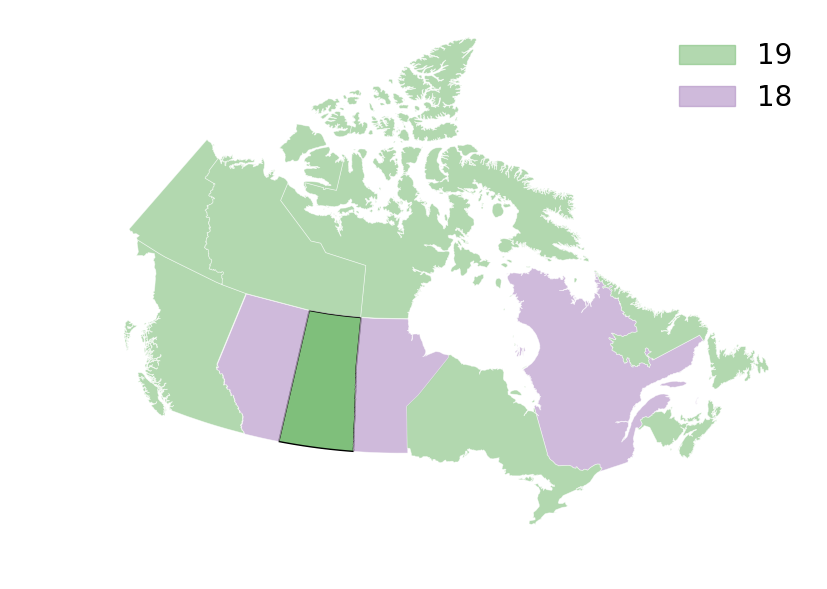

In [105]:
fig = plt.figure(figsize=(10,7), dpi=300)
ax = fig.add_subplot(111)
for nshp in xrange(Nshp):
    ptchs = []
    pts = np.array(shapes[nshp].points) / 10000
    prt = shapes[nshp].parts
    par = list(prt) + [pts.shape[0]]
    for pij in xrange(len(prt)):
        ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    if nshp == 2:
        ax.add_collection(PatchCollection(ptchs,facecolor=col(data[nshp+1]), edgecolor='black', linewidths=1.0, label=str(data[nshp+1])))
    elif nshp == 3:
        ax.add_collection(PatchCollection(ptchs,facecolor=col(data[nshp+1]), edgecolor='white', alpha=0.6, linewidths=.5, label=str(data[nshp+1])))
    else:
        ax.add_collection(PatchCollection(ptchs,facecolor=col(data[nshp+1]), edgecolor='white', alpha=0.6, linewidths=.5))
ax.set_xlim(-300,350)
ax.set_ylim(0,500)
ax.axis('off')

greedpatch = patches.Patch(color=col(19), alpha=0.6, label='19')
purplepatch = patches.Patch(color=col(18), alpha=0.6, label='18')

plt.legend(handles=[greedpatch, purplepatch], fontsize=20,frameon=False)
plt.savefig('Canada.pdf')